# Haberman's Survival DataSet

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

** we have three features column**
1. age = age of patient at operation time (number)
2. year = year of operation (from 1958 to 1970)
3. nodes = number of positive axillary nodes (number)

 **and one class column**

here we have two class

1) 1 :- patient survive 5 year or longer

2) 2 :- patient not survive 5 year

**Objective** :-

here we classify patient Survive 5 year or not by age of patient, year of operation and number of positive axillary nodes.


# Step 1:- Add Library

In [1]:
# First we add all library which we can use on this dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2:- Collection & Analysis of Dataset

In [2]:
# import the Dataset

haberman = pd.read_csv("haberman.csv")
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:
# information about dataset

haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age       306 non-null int64
year      306 non-null int64
nodes     306 non-null int64
status    306 non-null int64
dtypes: int64(4)
memory usage: 9.7 KB


here we have small amount of dataset which have 306 records. and plus point is dataset does not have any null value.

In [4]:
# know the columns 

haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

here we have three feature columns ['age','year','nodes'] and one label column ['status']

In [5]:
haberman.status.value_counts()

1    225
2     81
Name: status, dtype: int64

here we can say balanced dataset. because we have 1/3 data of other lable. so it's fine compare to other datasets.

# Step 3:- Univaraite analysis on Feature column

here we perform many univaraite analysis on feature column to know which is useful feature.

**Histogram plot**

In [6]:
# before histogram we divied lable column in two parts 1(Survive 5 year and long) and 2(not survive 5 year)

haberman_1  = haberman[haberman['status']==1]
haberman_2  = haberman[haberman['status']==2]


C:\Users\Chintan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Chintan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Chintan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


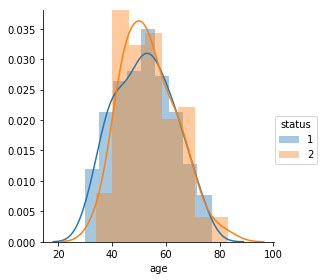

In [7]:
# here we drow histogram plot on age column
sns.FacetGrid(haberman,hue = 'status',size=4).map(sns.distplot,'age').add_legend()

C:\Users\Chintan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Chintan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Chintan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


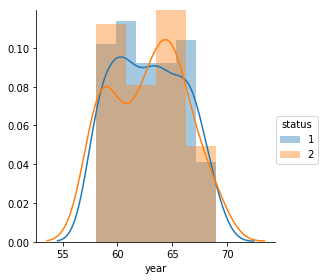

In [8]:
# here we drow histogram plot on year column
sns.FacetGrid(haberman,hue='status',size=4).map(sns.distplot,'year').add_legend()

C:\Users\Chintan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Chintan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Chintan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


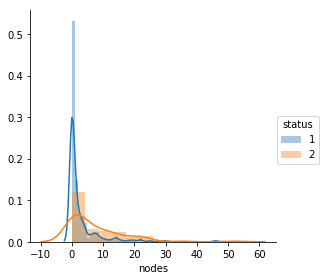

In [9]:
# here we drow histogram plot on nodes column
sns.FacetGrid(haberman,hue='status',size=4).map(sns.distplot,'nodes').add_legend()

here in Histogram graph survival and non-survival both overlap each other. but nodes graph slightly diffrent from age and year graph. 
- In nodes graph we say that 0 to 5 number of positive axillary nodes patient have higher chance for Survive more then five year.
- And more then 5 number of positive axillary nodes patient have less chance for Survive more then 5 year.

** PDF(Probability Density Function) & CDF(Cumulative Distribution Function) **

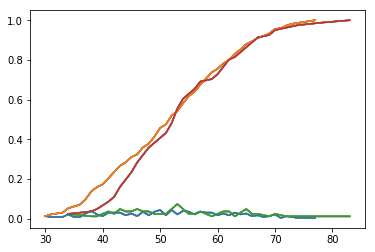

In [26]:
from functools import reduce
fet_col = 'age'
def PDFCDF(df,fet_col):
    
    """
    In this Function we find PDF and CDF.
    Input :- Function parameter is datafram and feature column.
    Output :- PDF & CDF graph 
    """
    
    label = df.columns[-1]
    for i in label:
        
        for i in df[label].unique():  # for all feature
            lab = i
            df_setosa = df[df[label]== lab]

            seto_gp =  df_setosa.groupby(fet_col)  #only one Feature
                    
            lis_setosa = []
            setosa_len = []
            setosa_count =  []
            setosa_count_div = []
            
            for i in seto_gp:    # list of perticular feature 
                lis_setosa.append(i)
            
            for i in range(len(lis_setosa)):  # here we got dataframe of perticuler feature
                setosa_len.append(lis_setosa[i][1][fet_col].unique()[0])
                setosa_count.append(len(lis_setosa[i][1]))
            aa = []
            for i in range(len(setosa_count)):
                divv = setosa_count[i]/sum(setosa_count)
                setosa_count_div.append(divv)

            su = reduce(lambda x,y: x+y,setosa_count_div)
            a = 0
            for i in setosa_count_div:
                a = a+i
                aa.append(a)
            plt.plot(setosa_len,setosa_count_div)
            plt.plot(setosa_len,aa)
PDFCDF(haberman,fet_col)

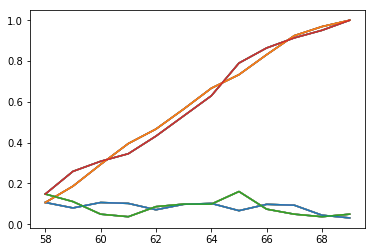

In [11]:
fet_col = 'year'
PDFCDF(haberman,fet_col)

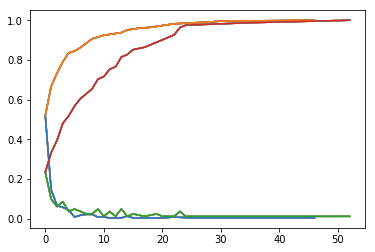

In [12]:
fet_col = 'nodes'
PDFCDF(haberman,fet_col)

In PDF & CDF graphs 83% of patient have less then 5 number of positive axillary nodes who Survive 5 year and longer.

**Boxplot**

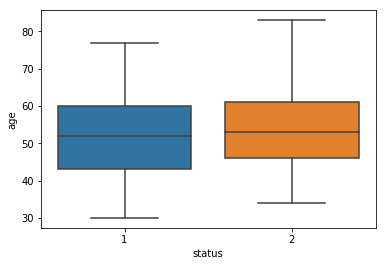

In [28]:
sns.boxplot(x='status',y='age',data=haberman)

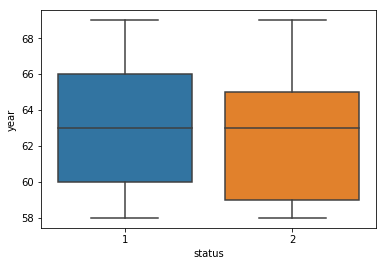

In [14]:
sns.boxplot(x='status',y='year',data=haberman)

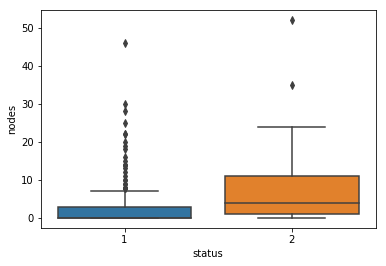

In [15]:
sns.boxplot(x='status', y = 'nodes', data = haberman)

  From nodes boxplot
- here in boxplot 75% of patient survive more then 5 year, who have number of positive axillary nodes is less then 3.
- and approximately 50% of patient not survive 5 year who have number of positive axillary nodes is more then 3.

**Violinplot**

C:\Users\Chintan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


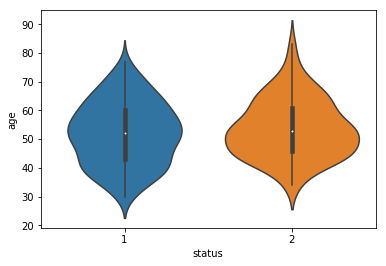

In [16]:
sns.violinplot(x='status',y='age',data=haberman)

C:\Users\Chintan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


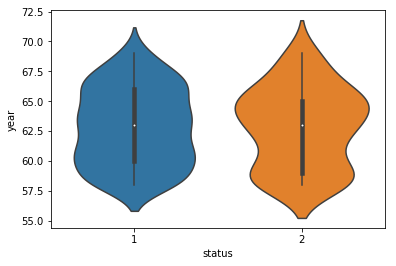

In [17]:
sns.violinplot(x='status',y='year',data=haberman)

C:\Users\Chintan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


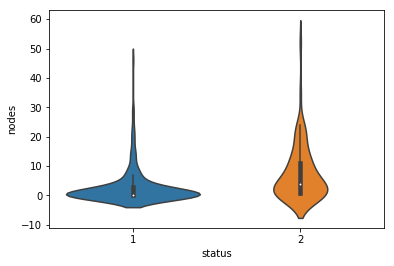

In [18]:
sns.violinplot(x='status',y='nodes',data=haberman)

- here in nodes violinplot 75% of patient have less then 3 number of positive axillary nodes who can survive more then 5 year after treatment.
- so number of positive axillary nodes are increase then it's difficult to survive longer. 

# Step 4:- Bi-variate analysis on Feature columns

**2D Scatter plot**

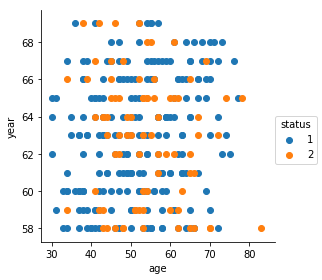

In [19]:
sns.FacetGrid(haberman,hue='status',size=4).map(plt.scatter,'age','year').add_legend()

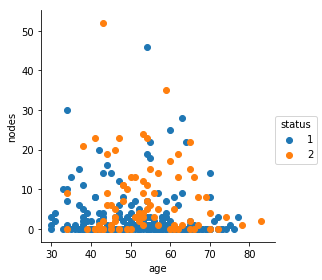

In [20]:
sns.FacetGrid(haberman,hue='status',size=4).map(plt.scatter,'age','nodes').add_legend()

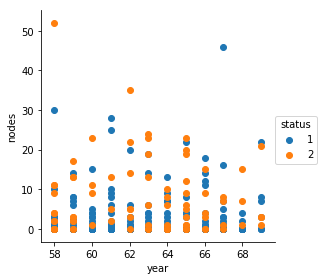

In [21]:
sns.FacetGrid(haberman,hue='status',size=4).map(plt.scatter,'year','nodes').add_legend()

here using 2D-Scatter plot we can't differentiate Survival and Non-survival patient.

**Pairplot**

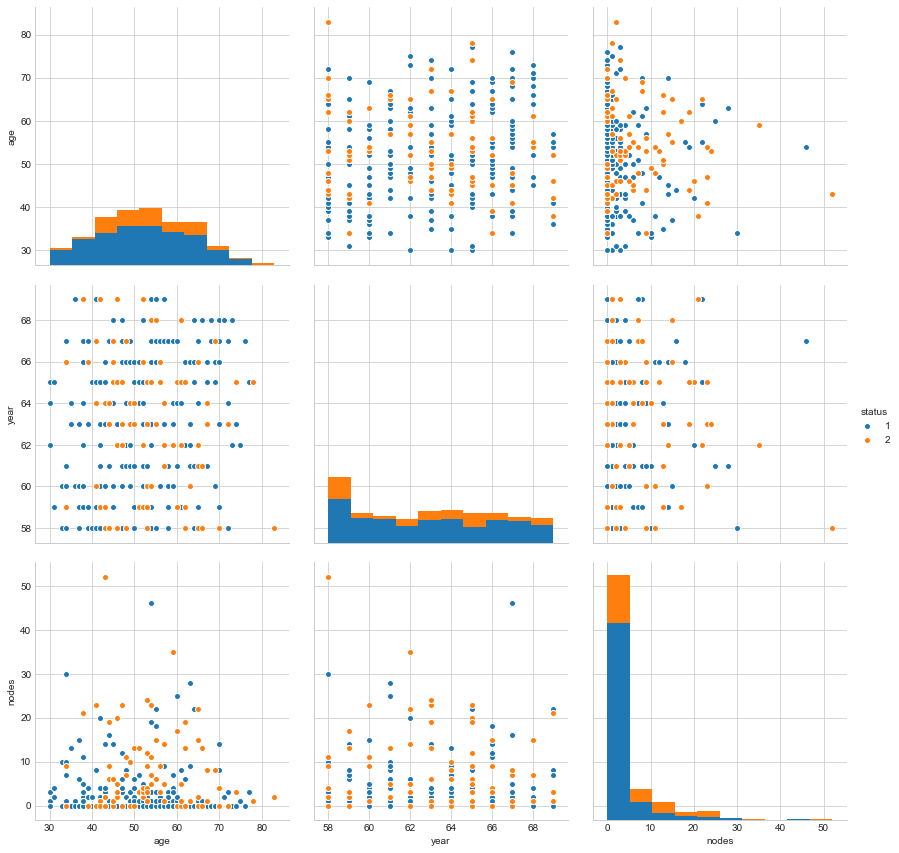

In [35]:
sns.set_style("whitegrid")
sns.pairplot(haberman,hue='status',vars = ["age", "year", "nodes"], size = 4)

also here we can't specify the Survival and non-Survival patient.

# Step 5:- Conclusion

here using haberman brest cancer dataset. feature['nodes'] is useful feature. using nodes feature we say

1) 83% of patient have less then 5 number of positive axillary nodes who Survive 5 year and longer.

2) approximately 50% of patient not survive 5 year who have number of positive axillary nodes is more then 3.